# Filip Kucia

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import powerlaw

# 1
Draw a histogram with marked sigma intervals for random variables rom the normal distribution.

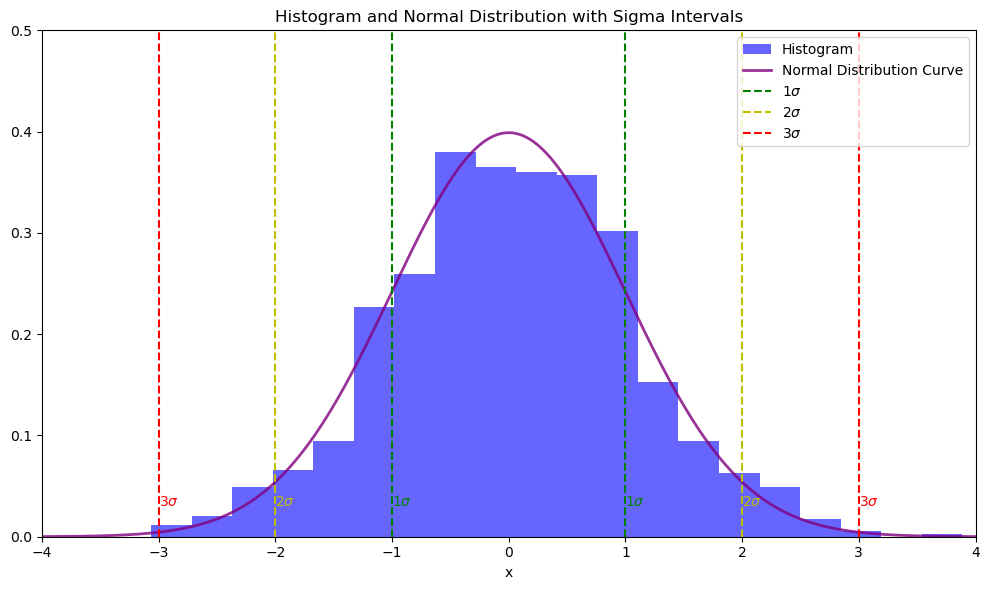

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the normal distribution function
def normal_distribution(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

# Generate random variables from the normal distribution
data = np.random.normal(0, 1, 1000)
x = np.linspace(-4, 4, 1000)
# Mark the sigma intervals (mean +/- sigma)
mean = 0
std_dev = 1
sigma_intervals = [mean - std_dev, mean, mean + std_dev]
colors = ['w', 'g', 'y', 'r']

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Histogram')

# Plot the normal distribution curve
ax.plot(x, normal_distribution(x), linewidth=2, color='purple', alpha=0.8, label='Normal Distribution Curve')

# Add vertical lines for sigma intervals and corresponding text
for i in range(1, 4):
    ax.axvline(mean + i * std_dev, color=colors[i], linestyle='--', label=f'{i}$\sigma$')
    ax.axvline(mean - i * std_dev, color=colors[i], linestyle='--')
    ax.text(mean + i * std_dev, 0.03, f'{i}$\sigma$', color=colors[i])
    ax.text(mean - i * std_dev, 0.03, f'{i}$\sigma$', color=colors[i])

# Set axis limits and labels
ax.set_ylim(0, 0.5)
ax.set_xlim(-4, 4)
ax.set_title('Histogram and Normal Distribution with Sigma Intervals')
ax.set_xlabel('x')

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


## 2
Check the Pareto rule for variables from the geometric distribution

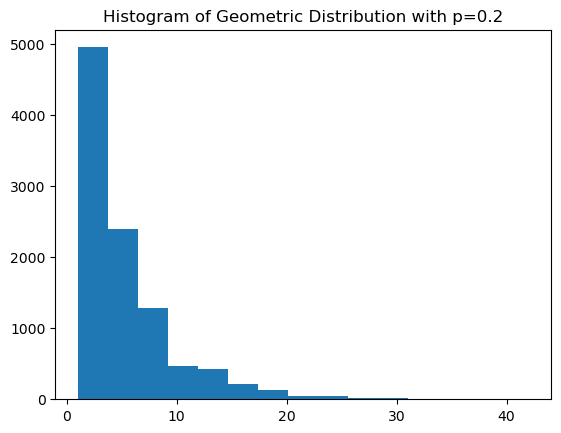

In [38]:
np.random.seed(666)
N = 10000
x = np.random.geometric(p=0.2, size=N)
plt.hist(x, bins=15)
plt.title("Histogram of Geometric Distribution with p=0.2")
plt.show()

# Sorting the observed values for the first distribution
x_sorted = np.sort(x)

# Cumulative sum of the sorted values
cumulative_sum = np.cumsum(x_sorted)

# Total sum of the values (to normalize and get proportions)
total_sum = np.sum(x_sorted)

# Cumulative expected value proportion
cumulative_proportion = cumulative_sum / total_sum

# Find the k value where cumulative expected value reaches 80%
target_proportion = 0.8
k_value = np.argmax(cumulative_proportion >= target_proportion)


80% percent of the cumulative expected value is contained in the first 0.95 fraction of the data.
80% percent of the data is contained in the [0, 8.0] interval, which covers 19.05% of the interval.


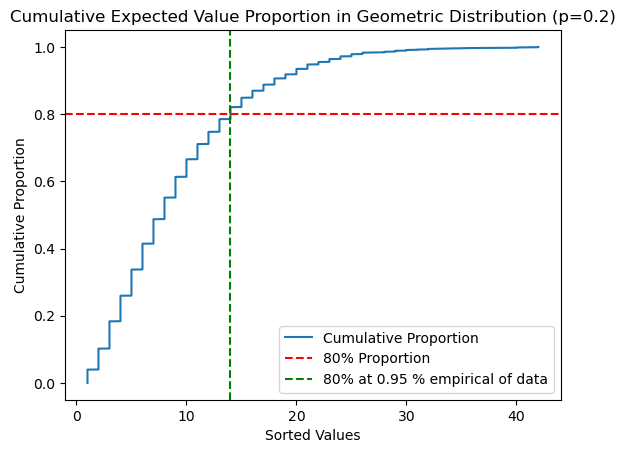

In [39]:
# Compute fraction for k_value
fraction_of_k = k_value / N

# Update the final print statement to reflect the fraction instead of the confusing k value
q08 = np.quantile(x, 0.8)
max_ = np.max(x)

# Displaying the 80/20 rule comparison
coverage_percentage = np.round(100 * q08 / max_, 2)

# Merging everything and printing the final result about the 80/20 rule
print(f'80% percent of the cumulative expected value is contained in the first {fraction_of_k:.2f} fraction of the data.')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {coverage_percentage}% of the interval.')

# Plot cumulative proportion against sorted values and mark the 80% point
plt.plot(x_sorted, cumulative_proportion, label="Cumulative Proportion")
plt.axhline(y=0.8, color='red', linestyle='--', label="80% Proportion")
plt.axvline(x=x_sorted[k_value], color='green', linestyle='--', label=f'80% at {fraction_of_k:.2f} % empirical of data')
plt.title("Cumulative Expected Value Proportion in Geometric Distribution (p=0.2)")
plt.xlabel("Sorted Values")
plt.ylabel("Cumulative Proportion")
plt.legend()
plt.show()



# 3
Draw a histogram with marked sigm intervals for variables drawn from a continuous power distribution

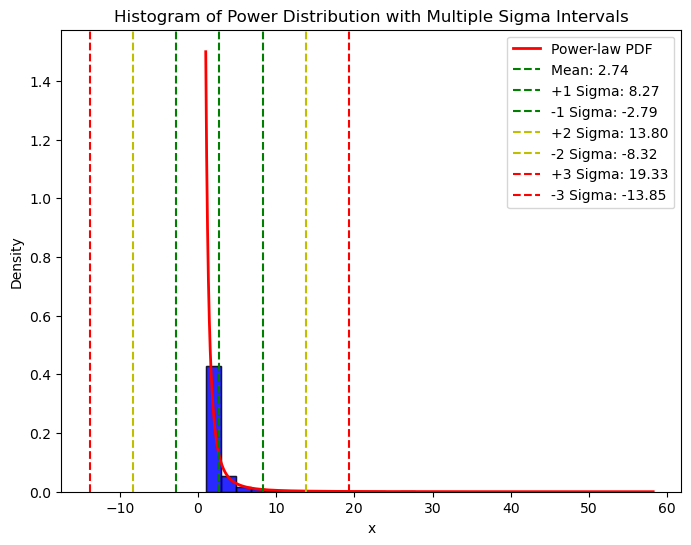

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Define the power distribution PDF
def power_distribution_pdf(x, alpha, xmin):
    return (alpha - 1) / xmin * (x / xmin)**(-alpha)

# Inverse CDF for sampling (derived from the PDF)
def inverse_transform_sampling(alpha, xmin, size):
    u = np.random.uniform(0, 1, size)
    return xmin * (1 - u)**(-1 / (alpha - 1))

# Parameters for the power distribution
alpha = 2.5  # Example value for the exponent
xmin = 1.0  # Minimum x value

# Generate samples
num_samples = 1000
samples = inverse_transform_sampling(alpha, xmin, num_samples)

# Create histogram
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Plot the theoretical PDF for comparison
x_vals = np.linspace(xmin, np.max(samples), 1000)
pdf_vals = power_distribution_pdf(x_vals, alpha, xmin)

# Update the plot to mark 2 and 3 sigma intervals with specified colors
colors = ['g', 'y', 'r']  # Colors for sigma intervals

plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Plot the theoretical PDF for comparison
plt.plot(x_vals, pdf_vals, 'r-', lw=2, label='Power-law PDF')

# Mark sigma intervals
plt.axvline(mean, color=colors[0], linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(mean + std_dev, color=colors[0], linestyle='--', label=f'+1 Sigma: {mean + std_dev:.2f}')
plt.axvline(mean - std_dev, color=colors[0], linestyle='--', label=f'-1 Sigma: {mean - std_dev:.2f}')

# 2 sigma intervals
plt.axvline(mean + 2*std_dev, color=colors[1], linestyle='--', label=f'+2 Sigma: {mean + 2*std_dev:.2f}')
plt.axvline(mean - 2*std_dev, color=colors[1], linestyle='--', label=f'-2 Sigma: {mean - 2*std_dev:.2f}')

# 3 sigma intervals
plt.axvline(mean + 3*std_dev, color=colors[2], linestyle='--', label=f'+3 Sigma: {mean + 3*std_dev:.2f}')
plt.axvline(mean - 3*std_dev, color=colors[2], linestyle='--', label=f'-3 Sigma: {mean - 3*std_dev:.2f}')

# Add labels and title
plt.title('Histogram of Power Distribution with Multiple Sigma Intervals')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


## 4

Histogram for observations drawn from zeta distrubtion

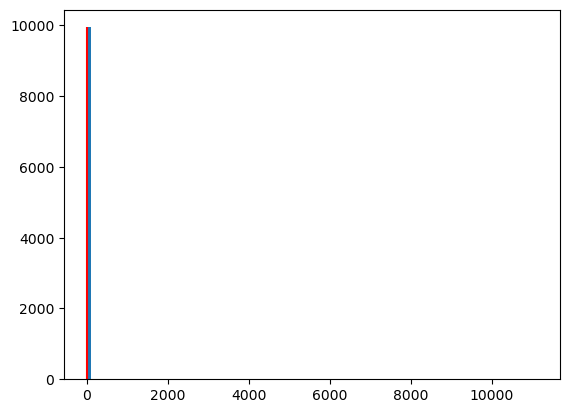

In [58]:
obs = np.random.zipf(a=2, size=N)
max_ = np.max(obs)
q08 = np.quantile(obs, 0.8)
bins = plt.hist(obs, bins=N//100)
plt.vlines([q08], 0, max(bins[0]), color='red')

In [59]:
print(f'All observations are contained in the [0, {max_}] interval')
print(f'80% percent of the data is contained in the [0, {q08}] interval, which covers {np.round(100 * q08/max_, 5)}% of the interval') 

All observations are contained in the [0, 11128] interval
80% percent of the data is contained in the [0, 3.0] interval, which covers 0.02696% of the interval


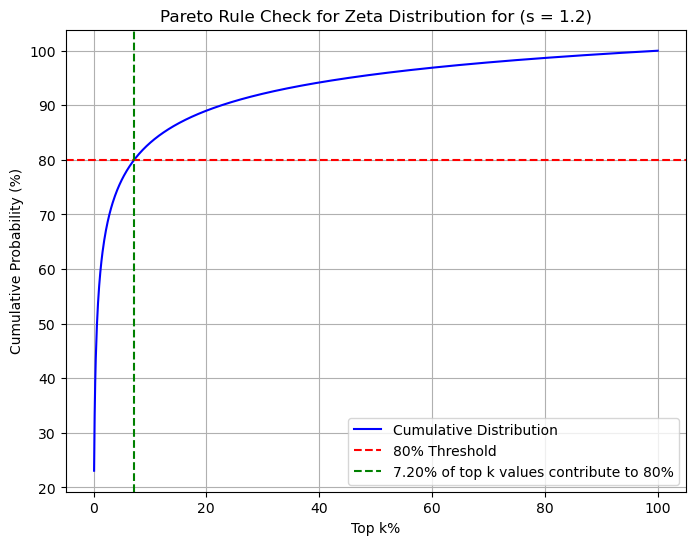

In [68]:
# Reimport the necessary libraries and re-execute the calculation for the Pareto rule

import numpy as np
from scipy.special import zeta
import matplotlib.pyplot as plt

# Define the zeta distribution PMF
def zeta_distribution_pmf(k, s):
    return (1 / zeta(s)) * k**(-s)

# Parameters for the zeta distribution
s = 1.2  # Shape parameter
k_values = np.arange(1, 1001)  # Generate k values from 1 to 1000

# Calculate probabilities for the zeta distribution
probabilities = zeta_distribution_pmf(k_values, s)

# Sort probabilities in descending order to check the Pareto rule
sorted_probabilities = np.sort(probabilities)[::-1]

# Calculate cumulative sums of sorted probabilities
cumulative_sum = np.cumsum(sorted_probabilities)

# Normalize the cumulative sums to a percentage of total probability
cumulative_sum_percent = cumulative_sum / cumulative_sum[-1] * 100

# Check the percentage of k-values that contribute to 80% of the cumulative probability
percent_contributing_to_80 = np.argmax(cumulative_sum_percent >= 80) + 1  # Find index where it crosses 80%

# Convert to percentage of k-values
percentage_k_values = percent_contributing_to_80 / len(k_values) * 100

# Plot the Pareto curve and mark the 80% contribution line
percent_top_20 = np.arange(1, len(cumulative_sum_percent) + 1) / len(cumulative_sum_percent) * 100

plt.figure(figsize=(8, 6))
plt.plot(percent_top_20, cumulative_sum_percent, label='Cumulative Distribution', color='b')

# Mark the actual percentage that contributes to 80%
plt.axhline(80, color='r', linestyle='--', label='80% Threshold')
plt.axvline(percentage_k_values, color='g', linestyle='--', label=f'{percentage_k_values:.2f}% of top k values contribute to 80%')

# Add labels and title
plt.title(f'Pareto Rule Check for Zeta Distribution for (s = {s})')
plt.xlabel('Top k%')
plt.ylabel('Cumulative Probability (%)')
plt.legend()
plt.grid(True)
plt.show()


## 5

 generate BA network and ER graphs using built-in functions.
 - observe the presence of hubs.
 - draw a vertex degree histogram.
 - compute estimators of expectation and variance for vertex
 degrees.
 - how are the two cases different?

In [69]:
import networkx as nx

Barabasi - albert network is generated as follows: Everytime we pick a new node, we connect it with $m$ existing nodes. Repeat $n$ times 

Erdos renyi graph is generated as follows: Pick $N$ nodes, and for each pair of nodes, the probability that they should be connected is equal to $p$.

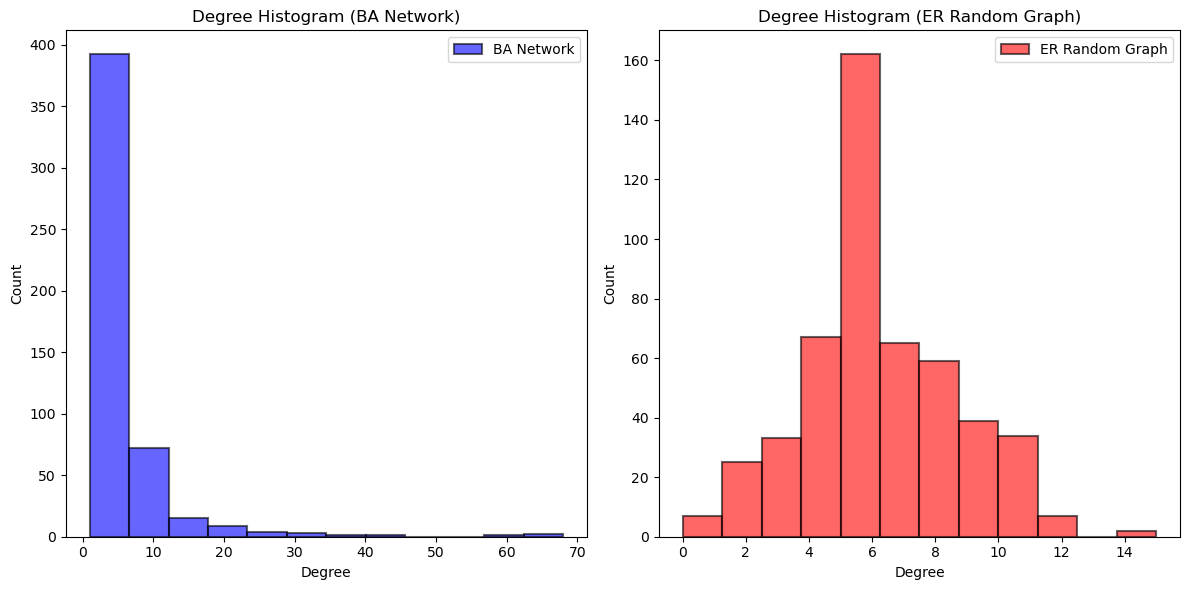

Average degree in BA network: 5.96 , and it is variance is 44.52
Average degree in ER random graph: 6.15, and it is variance is 5.87
Number of hubs in BA network: 62
Number of hubs in ER random graph: 82


In [81]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Barabasi-Albert (BA) network
n = 500
m = 3  
ba_graph = nx.barabasi_albert_graph(n, m)

# Erdos-Renyi (ER) random graph
p = 0.012
er_graph = nx.erdos_renyi_graph(n, p)

# Calculate degree distributions
ba_degrees = [degree for node, degree in ba_graph.degree()]
er_degrees = [degree for node, degree in er_graph.degree()]

# Plot degree histograms with black borders along the bars
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.hist(ba_degrees, bins=12, color='b', alpha=0.6, label='BA Network', edgecolor='black', linewidth=1.5)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Histogram (BA Network)')
plt.legend()

plt.subplot(122)
plt.hist(er_degrees, bins=12, color='r', alpha=0.6, label='ER Random Graph', edgecolor='black', linewidth=1.5)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Histogram (ER Random Graph)')
plt.legend()

plt.tight_layout()
plt.show()

# Calculating hubs
ba_hubs = [node for node, degree in ba_graph.degree() if degree >= np.percentile(ba_degrees, 90)]
er_hubs = [node for node, degree in er_graph.degree() if degree >= np.percentile(er_degrees, 90)]

# Displaying results
ba_avg_degree = np.mean(ba_degrees)
er_avg_degree = np.mean(er_degrees)
ba_var_degree = np.var(ba_degrees)
er_var_degree = np.var(er_degrees)

ba_hub_count = len(ba_hubs)
er_hub_count = len(er_hubs)

print(f'Average degree in BA network: {ba_avg_degree:.2f} , and it is variance is {ba_var_degree:.2f}')
print(f'Average degree in ER random graph: {er_avg_degree:.2f}, and it is variance is {er_var_degree:.2f}')
print(f'Number of hubs in BA network: {ba_hub_count}')
print(f'Number of hubs in ER random graph: {er_hub_count}')

# P3.1
Football data from previous project

In [19]:
G = nx.generators.random_graphs.barabasi_albert_graph(15, 5)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def read_net_file(filepath):
    """
    Reads a .net file and constructs a directed graph using NetworkX.
    The file must contain *Vertices and *Arcs sections for nodes and edges.
    """
    G = nx.DiGraph()  # Initialize a directed graph
    vertices_section = False  # Tracks if we are in the vertices section
    arcs_section = False  # Tracks if we are in the arcs section
    
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()

            # Detect sections in the .net file
            if "*Vertices" in line:
                vertices_section = True
                arcs_section = False
                continue
            elif "*Arcs" in line:
                vertices_section = False
                arcs_section = True
                continue

            # Process vertices (nodes)
            if vertices_section:
                parts = line.split()
                if len(parts) >= 4:
                    node_id = int(parts[0])
                    label = parts[1].strip('"')  # Remove quotes around the label
                    x, y = float(parts[2]), float(parts[3])  # Coordinates
                    G.add_node(node_id, label=label, x=x, y=y)  # Add node with attributes

            # Process arcs (edges)
            if arcs_section:
                parts = line.split()
                if len(parts) == 3:
                    source = int(parts[0])  # Start of the edge
                    target = int(parts[1])  # End of the edge
                    weight = int(parts[2])  # Weight of the edge
                    G.add_edge(source, target, weight=weight)  # Add edge with weight
    
    return G

def draw_graph(G, layout='kamada_kawai'):
    """
    Draws the directed graph with positions based on node attributes or using a chosen layout,
    node size based on degree, and edge labels to display weights.
    
    Parameters:
    - G: NetworkX graph object
    - layout: String to specify the layout type (options: 'kamada_kawai', 'circular', 'spring', 'spectral')
    """
    # Choose the layout based on the input
    if layout == 'kamada_kawai':
        positions = nx.kamada_kawai_layout(G)
    elif layout == 'circular':
        positions = nx.circular_layout(G)
    elif layout == 'spring':
        positions = nx.spring_layout(G)
    elif layout == 'spectral':
        positions = nx.spectral_layout(G)
    else:
        # Default to kamada_kawai layout if an invalid option is provided
        positions = nx.kamada_kawai_layout(G)
    
    # Calculate node degrees to adjust node sizes
    degrees = np.array([deg for node, deg in G.degree()])

    # Normalize node sizes between a minimum and maximum size
    min_size = 300
    max_size = 4000
    node_sizes = min_size + (degrees - degrees.min()) / (degrees.max() - degrees.min()) * (max_size - min_size)
    
    # Create a colormap for node degrees
    node_color_map = degrees

    plt.figure(figsize=(12, 10))  # Set the figure size

    # Draw the graph
    nx.draw(G, pos=positions, 
            with_labels=True, 
            labels=nx.get_node_attributes(G, 'label'), 
            node_size=node_sizes, 
            node_color=node_color_map, cmap=plt.cm.coolwarm,  # Use color map based on degree
            font_size=10, font_color='black', 
            edge_color='gray', arrows=True, 
            arrowstyle='-|>', arrowsize=20,  # Arrow style and size for edges
            linewidths=1.5)

    # Add edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, font_size=9)

    plt.title(f'Football Network Graph ({layout} layout)', fontsize=16, fontweight='bold')  # Add a title
    plt.show()

# Example usage:
filepath = 'football.net'  # Replace with your actual .net file path
G = read_net_file(filepath)

# Call draw_graph with different layouts
draw_graph(G, layout='kamada_kawai')  # Kamada-Kawai layout
draw_graph(G, layout='circular')      # Circular layout
draw_graph(G, layout='spring')        # Spring layout
draw_graph(G, layout='spectral')      # Spectral layout


FileNotFoundError: [Errno 2] No such file or directory: 'data/football.net'

In [2]:
pwd()

'C:\\Users\\Filip\\Microsoft VS Code'

Uses eigenvectors and spectral matrix decomopsition

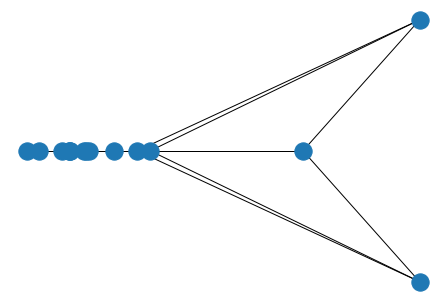

In [16]:
nx.draw_spectral(G)

Places nodes in a circle

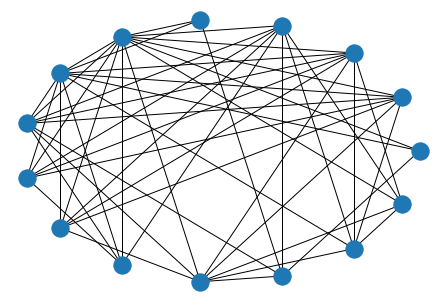

In [17]:
nx.draw_circular(G)

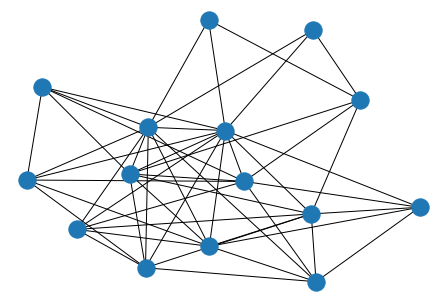

In [18]:
nx.draw_kamada_kawai(G)

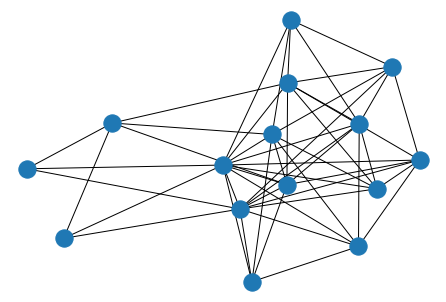

In [19]:
nx.draw_spring(G)

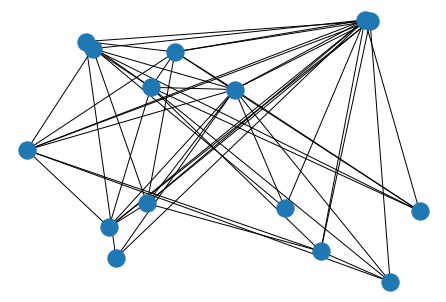

In [20]:
nx.draw_random(G)

## 6.3

In [17]:
%matplotlib notebook

In [30]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
nx.draw_networkx(G, nx.spring_layout(G, iterations=1, seed=42), with_labels=False)

def init():
    nx.draw_networkx(G, nx.spring_layout(G, iterations=1, seed=42), with_labels=False, ax=ax)
    return ax
    

def update(frame):
    ax.clear()
    nx.draw_networkx(G, nx.spring_layout(G, iterations=round(frame), seed=42), with_labels=False, ax=ax)
    ax.set_title(f"Iteration nr. {round(frame)}/50")
    return ax

ani = FuncAnimation(fig, update, frames=np.linspace(0, 50), interval=100, init_func=init)

<IPython.core.display.Javascript object>

In [21]:
ani